In [1]:
# Necessary imports
import gc

import numpy as np
import tensorflow as tf

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib notebook

Shape of X train:(800, 2), y_train:(800, 1), X_test:(200, 2) and y_test:(200, 1)
Positive training samples : (404, 2)
Negative training samples : (396, 2)


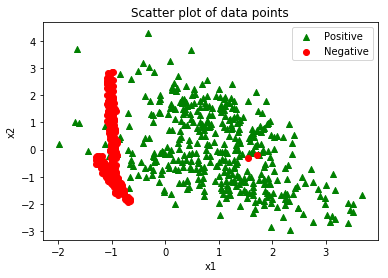

In [5]:
# Generate dataset
X, y = datasets.make_classification(n_samples=1000, n_features=2,
                                    n_informative=2, n_redundant=0)

train_samples = int(X.shape[0]*0.8)
X_train = X[:train_samples] 
y_train = y[:train_samples].reshape([-1, 1])
X_test = X[train_samples:] 
y_test = y[train_samples:].reshape([-1, 1])

print("Shape of X train:{}, y_train:{}, X_test:{} and y_test:{}".format(X_train.shape, 
                                                                        y_train.shape, 
                                                                        X_test.shape, 
                                                                        y_test.shape))

# Visualise data
X_train_pos = np.asarray([i for idx, i in enumerate(X_train) if y_train[idx]==[1]]).reshape([-1, 2])
X_train_neg = np.asarray([i for idx, i in enumerate(X_train) if y_train[idx]==[0]]).reshape([-1, 2])
print("Positive training samples : {}".format(X_train_pos.shape))
print("Negative training samples : {}".format(X_train_neg.shape))

plt.scatter(x=X_train_pos[:,0], y=X_train_pos[:,1], c='g', marker='^', label="Positive")
plt.scatter(x=X_train_neg[:,0], y=X_train_neg[:,1], c='r', marker='o', label="Negative")
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot of data points')
plt.legend()
plt.show()

In [6]:
# Define placeholders
X = tf.placeholder(tf.float32, shape=[None, 2], name="X_train")
y = tf.placeholder(tf.float32, shape=[None, 1], name="y_train")

# Define variables
W = tf.get_variable(name='W', shape=[2, 1], initializer=tf.random_normal_initializer())
b = tf.get_variable(name='b', shape=[1], initializer=tf.random_normal_initializer())

In [7]:
learning_rate = 0.01
# Make prediction
logits = tf.matmul(X, W) + b
prediction = tf.nn.sigmoid(logits)
# Calculate error
error = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=y))
# Optimize error
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(error)

In [8]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

total_error = []
with tf.Session() as sess:
    sess.run(init)
    # Train for 1000 epochs
    for epoch in range(1, 501):
        _, _error, _W, _b = sess.run([optimizer, error, W, b], feed_dict={X: X_train, y: y_train})
        if epoch % 20 == 0:
            print("Epoch: {}, Error: {}, W: {}, b: {}".format(epoch, _error, _W, _b))
        total_error.append(_error)             
        
    # Calculate the correct predictions
    corr_pred = tf.reshape(tf.to_float(tf.greater(prediction, 0.5)), shape=[-1, 1])

    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.to_float(tf.equal(y, corr_pred)))
    
    train_acc = sess.run(accuracy, feed_dict={X:X_train, y:y_train})
    test_acc = sess.run(accuracy, feed_dict={X:X_test, y:y_test})


Epoch: 20, Error: 0.44928300380706787, W: [[ 0.78213495]
 [-0.26875982]], b: [-0.2163019]
Epoch: 40, Error: 0.43419915437698364, W: [[ 0.8279703 ]
 [-0.24102806]], b: [-0.20468254]
Epoch: 60, Error: 0.42052239179611206, W: [[ 0.87175596]
 [-0.21495472]], b: [-0.1933734]
Epoch: 80, Error: 0.40808960795402527, W: [[ 0.9136475 ]
 [-0.19043514]], b: [-0.18236274]
Epoch: 100, Error: 0.39675766229629517, W: [[ 0.95378643]
 [-0.16736838]], b: [-0.17163792]
Epoch: 120, Error: 0.3864014744758606, W: [[ 0.99230176]
 [-0.14565833]], b: [-0.16118577]
Epoch: 140, Error: 0.3769117593765259, W: [[ 1.0293107 ]
 [-0.12521394]], b: [-0.15099302]
Epoch: 160, Error: 0.368193119764328, W: [[ 1.0649194 ]
 [-0.10594963]], b: [-0.14104651]
Epoch: 180, Error: 0.36016160249710083, W: [[ 1.0992254 ]
 [-0.08778516]], b: [-0.13133341]
Epoch: 200, Error: 0.35274460911750793, W: [[ 1.1323162 ]
 [-0.07064567]], b: [-0.12184137]
Epoch: 220, Error: 0.3458780348300934, W: [[ 1.1642716 ]
 [-0.05446146]], b: [-0.11255852]

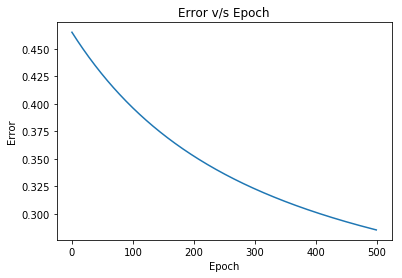

In [9]:
# Subplots or error and leanred regression line
fig = plt.figure()
ax1 = fig.add_subplot(111)
# Plot 1
ax1.plot(total_error)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Error')
ax1.set_title('Error v/s Epoch')
plt.show()

In [10]:
print("Train accuracy: {}, Test accuracy: {}".format(train_acc, test_acc))

Train accuracy: 0.9200000166893005, Test accuracy: 0.925000011920929


# References

- [Logistic Regression with TensorFlow](https://serrate.net/2018/02/18/logistic-regression-with-tensorflow/)